In [1]:
# Import packages
import torch
from torchvision import transforms
import torch.nn as nn
from torchvision.models import resnet50
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
# NETS: resnet50
class ResNet50(nn.Module):

    def __init__(self):
        super(ResNet50, self).__init__()
        self.resnet = resnet50()
        self.resnet.fc = nn.Linear(2048, 2) #adjust the output of the last fully connected layer to 2 dimensions

    def forward(self,x):
        return self.resnet(x)

model = ResNet50()

In [3]:
# The prediction function (for general users)
def TUMOR_TYPE_PREDICTOR(model_path, img_path):

    img = cv2.imread(img_path)
    plt.imshow(img) #print the input image

    transform = transforms.Compose([
        transforms.Resize([224,224]), #resize the image to the specified size
        transforms.ToTensor(), #convert the image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalize the images 
    ])

    model = torch.load(model_path, map_location='cpu') #load the trained model and save to cpu for general users no matter Mac or other devices
    model.eval()
    tumor_type = ["benign", "malignant"]
    image = torch.unsqueeze(transform(Image.open(img_path).convert("RGB")), dim=0)
    with torch.no_grad():
        pred = torch.argmax(model(image),dim=-1).cpu().numpy()[0]

    print(f"This breast cancer histopathology slide is predicted to be: {tumor_type[pred]}")

    return

This breast cancer histopathology slide is predicted to be: malignant


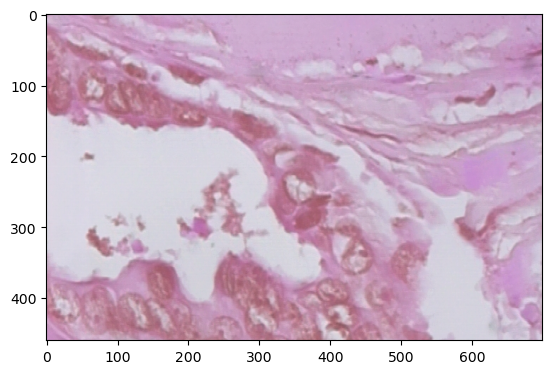

In [4]:
# Try the function!
TUMOR_TYPE_PREDICTOR(model_path='models/resnet50_epoch30_94.23.pth', #please input the model path
                     img_path='BreaKHis 400X/test/malignant/SOB_M_PC-14-19440-400-001.png') #please input the image path